In [1]:
from pantree.panTree import panTree
from pantree.recipe import recipeDB

from pantree.domains.ba import bonAppetit
from pantree.domains.epi import epicurious
from pantree.domains.nyt import NYT
from pantree.domains.srs_eats import srsEats
from pantree.domains.food_network import foodNetwork
from pantree.domains.all_recipes import allRecipes
from pantree.domains.food52 import food52

In [2]:
db = './data/recipeDB.db'

In [3]:
r = recipeDB(db)
# r.create_table()
# r.clear()
# r.save()
# r.close()

In [ ]:
domains =[food52(db), bonAppetit(db), epicurious(db), NYT(db), srsEats(db), foodNetwork(db), allRecipes(db)]

for d in domains:
    print(d, d.db.count())
    d.scrape(depth = 0)

<pantree.domains.food52.food52 object at 0x7ff189705700> 22
<pantree.domains.ba.bonAppetit object at 0x7ff181af2280> 37
<pantree.domains.epi.epicurious object at 0x7ff16838d610> 43
<pantree.domains.nyt.NYT object at 0x7ff181af2a60> 47
<pantree.domains.srs_eats.srsEats object at 0x7ff198273c70> 57


In [8]:
d.db.get_ingredients()
d.db.serialize('./data/bank')

In [9]:
d.db.count()

699

In [11]:
p = panTree(['flour'], pickled_recipeBank = './data/bank')
p.process()
p.rank

['https://www.allrecipes.com/recipe/8399698/two-ingredient-dough-cinnamon-rolls/',
 'https://www.seriouseats.com/choux-pastry',
 'https://www.allrecipes.com/recipe/9870/easy-sugar-cookies/',
 'https://www.allrecipes.com/recipe/45396/easy-pancakes/',
 'https://www.allrecipes.com/recipe/216391/easy-sausage-gravy-and-biscuits/',
 'https://www.allrecipes.com/recipe/16383/basic-crepes/',
 'https://cooking.nytimes.com/recipes/1023312-kimchi-cheddar-biscuits',
 'https://cooking.nytimes.com/recipes/1021241-extra-flaky-pie-crust',
 'https://www.seriouseats.com/taiwan-eats-taiwanese-pineapple-cake-fung-li-su-recipe',
 'https://www.seriouseats.com/perfect-pita-bread-recipe',
 'https://www.seriouseats.com/classic-tarte-flambee-alsatian-pizza-recipe',
 'https://www.epicurious.com/recipes/food/views/fudgy-brownies',
 'https://www.epicurious.com/recipes/food/views/fraisier-strawberry-cream-cake',
 'https://www.allrecipes.com/recipe/6865/to-die-for-blueberry-muffins/',
 'https://www.allrecipes.com/rec

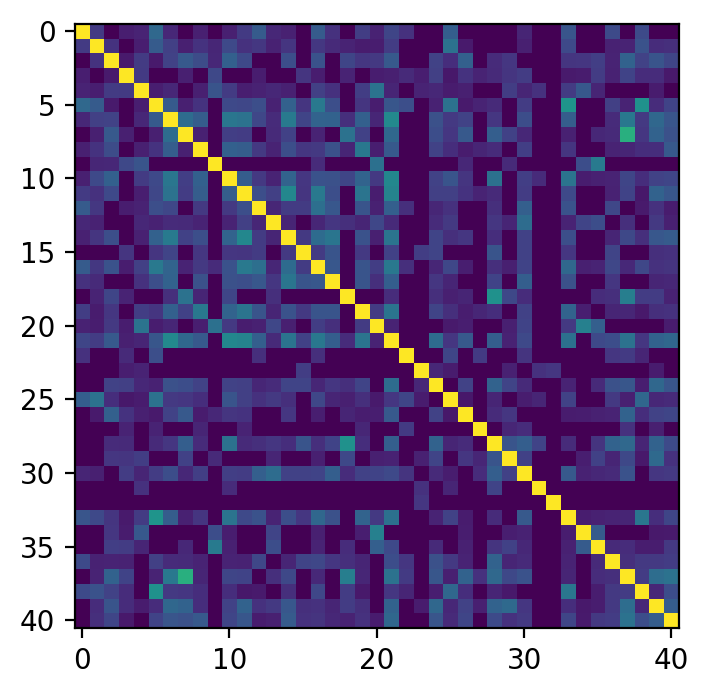

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse
plt.figure(dpi=200)
plt.imshow(np.array(p.bank.data.tocsc().T*p.bank.data.tocsc().todense())/\
           (np.matrix(scipy.sparse.linalg.norm(p.bank.data,axis=0)).T*np.matrix(scipy.sparse.linalg.norm(p.bank.data,axis=0))))